<a href="https://colab.research.google.com/github/Arminhosseini/autoencoder/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train, x_test = x_train.astype('float32') / 255.0 , x_test.astype('float32') / 255.0

print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


define autoencoder model

In [ ]:
latent_dim = 20

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu')                                    
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28,28))                                  
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


autoencoder = Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0318 - val_loss: 0.0198
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0179 - val_loss: 0.0169
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0167 - val_loss: 0.0165
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0163 - val_loss: 0.0163
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0161 - val_loss: 0.0161
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0160 - val_loss: 0.0160
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0159 - val_loss: 0.0160
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0159 - val_loss: 0.0159
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0158 - val_loss: 0.0158
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

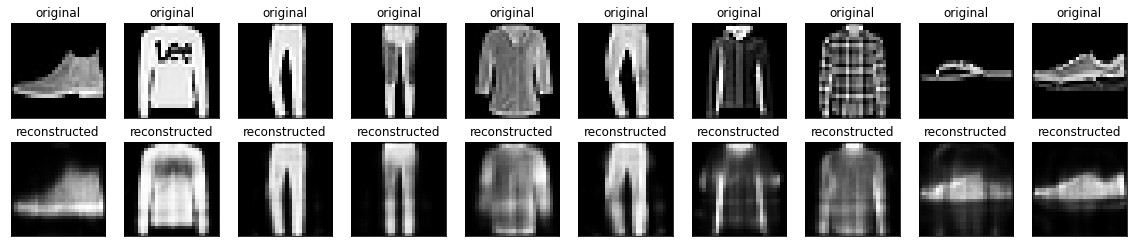

In [ ]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
  # display original
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i])
  plt.title('original')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstructed
  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i])
  plt.title('reconstructed')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

##Denoising

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train, x_test = x_train.astype('float32') / 255.0 , x_test.astype('float32') / 255.0

x_train,x_test = x_train[..., tf.newaxis], x_test[..., tf.newaxis]

print(x_train.shape, x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
noise_factor = 0.2

x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1)

<function matplotlib.pyplot.show>

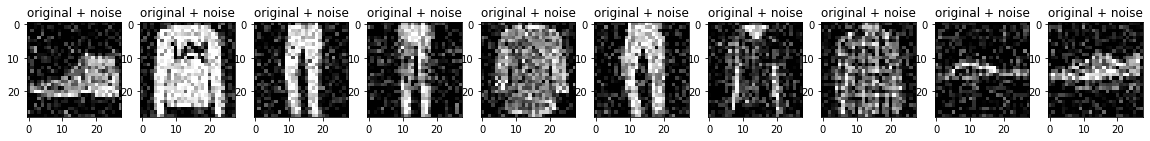

In [ ]:
n = 10

plt.figure(figsize=(20,2))

for i in range(n):
  ax = plt.subplot(1,n,i+1)
  plt.title('original + noise')
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.gray()

plt.show

In [ ]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28,28,1)),
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)
    ])
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, activation='relu', padding='same', strides=2),
      layers.Conv2DTranspose(16, kernel_size=3, activation='relu', padding='same', strides=2),
      layers.Conv2D(1, kernel_size=(3,3),activation='sigmoid', padding='same')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


autoencoder = Denoise()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train_noisy, x_train, epochs=10, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 37s 3ms/step - loss: 0.0163 - val_loss: 0.0096
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - val_loss: 0.0082
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0072 - val_loss: 0.0071
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0070 - val_loss: 0.0069
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.00

In [ ]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

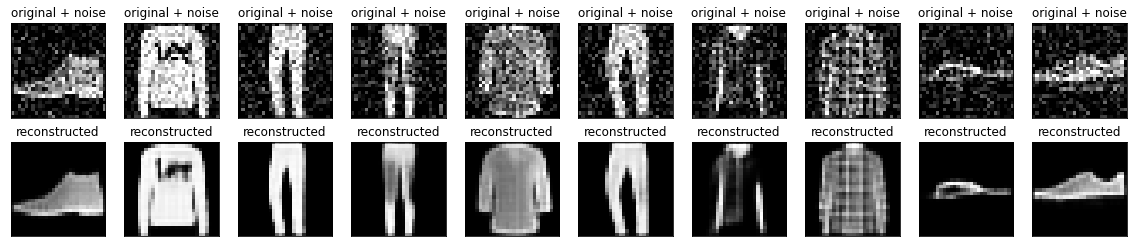

In [ ]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
  # display original + noise
  ax = plt.subplot(2,n,i+1)
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.title('original + noise')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstructed
  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(tf.squeeze(decoded_imgs[i]))
  plt.title('reconstructed')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()